### BUSINESS UNDERSTANDING

#### OVERVIEW

The dataset represents electronic health records collected from a private hospital in Indonesia. It contains laboratory test results of patients, which are used to determine whether the patient should be classified as an in-care or out-care patient. 
The model will utilize the patients' test results, such as haematocrit, haemoglobins, erythrocyte count, leucocyte count, thrombocyte count, MCH, MCHC, MCV, age, and gender, to predict whether a patient should be classified as in-care or out-care, the model aims to provide a predictive tool for healthcare professionals. This tool can assist in the decision-making process by quickly determining whether a patient requires inpatient care (overnight hospitalization) or outpatient care (no overnight stay required)

### Business Problem

Doctors and Specialists using tests labs results of patients to classify their needed care into inpatient care or outpatient care which is time-consuming.The purpose of this study is to utilize machine learning in classifying patient care   into inpatient or outpatient to optimize resource allocation such as beds,staffing and other medical resources to improve efficiency and cost-effectiveness. 

### Business Objectives

- Improve Patient Care Classification by automating the process of categorizing patients based on their laboratory test results to ensure timely and appropriate treatment.

- Optimizing resource allocation by accurately predicting patient classifications, the hospital can optimize resource allocation, such as beds, staffing, and other medical resources. This ensures that the right resources are available to meet the needs of different patient categories, leading to improved efficiency and cost-effectiveness

### Data Understanding

The dataset is Electronic Health Record Predicting collected from a private Hospital in Indonesia. It contains the patient's laboratory test results used to determine next patient treatment whether in care or out care. This dataset was downloaded from Kaggle https://www.kaggle.com/datasets/saurabhshahane/patient-treatment-classification

Given is the attribute name and a brief description.


- HAEMATOCRIT /Continuous /35.1 / Patient laboratory test that measures the proportion of red blood cells in your blood


- HAEMOGLOBINS/Continuous/11.8 / Patient laboratory test that measures the levels of hemoglobin in your blood

- ERYTHROCYTE/Continuous/4.65 / Patient laboratory test that measures how many red blood cells (RBCs) your blood contains.

- LEUCOCYTE /Continuous /6.3 / Patient laboratory test that measures the number of white blood cells in your body
- THROMBOCYTE- test for the measurement of platelets count in your blood.

- MCH-Mean corpuscular hemoglobin, test for the measurement of the amount of hemoglobin in a red blood cell.

- MCHC/Continuous/33.6/ Patient laboratory test that evaluate whether RBC are carrying an appropriate amount of hemoglobin(mean corpuscular hemoglobin concentration)

- MCV/Continuous /75.5/ Patient laboratory tests that help diagnose or monitor certain blood disorders, including anemia(mean corpuscular volume)

- AGE-Patient age

- SEX- Patient gender

- SOURCE-The class target in care patient and out care patient.



In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('hosp_data.csv')
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


In [3]:
#cheking data shape
df.shape

(4412, 11)

 Data contains 4412 rows and 11 columns

In [4]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


- The data frame contains mix data types e,g float,integer and object(usually string)
- Also shows having 4412 non-null values present in each column.

In [5]:
#Generating descriptive statistics 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,4412.0,38.197688,5.974784,13.70,34.375,38.60,42.50,69.00
HAEMOGLOBINS,4412.0,12.741727,2.079903,3.80,11.400,12.90,14.20,18.90
ERYTHROCYTE,4412.0,4.541260,0.784091,1.48,4.040,4.57,5.05,7.86
LEUCOCYTE,4412.0,8.718608,5.049041,1.10,5.675,7.60,10.30,76.60
THROMBOCYTE,4412.0,257.524479,113.972365,8.00,188.000,256.00,321.00,1183.00
MCH,4412.0,28.234701,2.672639,14.90,27.200,28.70,29.80,40.80
MCHC,4412.0,33.343042,1.228664,26.00,32.700,33.40,34.10,39.00
MCV,4412.0,84.612942,6.859101,54.00,81.500,85.40,88.70,115.60
AGE,4412.0,46.626473,21.731218,1.00,29.000,47.00,64.00,99.00


- Count indicates the number of non-null values present in each column e.g 4412.0
- mean represents the average value of each column 
- std denotes the standard deviation, which measures the dispersion or spread of the values around the mean.
- Min shows the minimum value observed in each column. For instance, the minimum HAEMATOCRIT level is 13.70.
- Max represents the maximum value observed in each column. For example, the maximum HAEMATOCRIT level is 69.00.

### Data Preparation

In [6]:
#checking for null values
df.isna().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

- data does not contain missing values

#### Validity check
- Range and Limits:
- Checking if the values of each variable fall within the expected range.
- Verify the validity of variables like HAEMATOCRIT, HAEMOGLOBINS, ERYTHROCYTE, LEUCOCYTE, THROMBOCYTE, MCH, MCHC, MCV, and AGE.

In [7]:
# Define the expected range for each variable
valid_ranges = {
    'HAEMATOCRIT': (0, 100),
    'HAEMOGLOBINS': (0, 20),
    'ERYTHROCYTE': (0, 10),
    'LEUCOCYTE': (0, 100),
    'THROMBOCYTE': (0, 2000),
    'MCH': (0, 50),
    'MCHC': (0, 50),
    'MCV': (0, 120),
    'AGE': (0, 120)
}

# Check if values fall within the expected range
for column, (min_val, max_val) in valid_ranges.items():
    invalid_rows = df.loc[(df[column] < min_val) | (df[column] > max_val)]
    if len(invalid_rows) > 0:
        print(f"Invalid values found in {column}:")
        print(invalid_rows)

- Ensure the validity of the SEX variable by checking that it contains only 'F' or 'M'.
- Verify if the SOURCE variable contains only the values out and in.

In [8]:

# Check validity of SEX variable
valid_genders = {'F', 'M'}
invalid_genders = set(df['SEX']) - valid_genders
if invalid_genders:
    print(f"Invalid genders found: {', '.join(invalid_genders)}")

#Check validity of source variable
valid_sources = {'in', 'out'}
invalid_sources = set(df['SOURCE']) - valid_sources
if invalid_sources:
    print(f"Invalid sources found: {', '.join(invalid_sources)}")

We do label encoding on the entire DataFrame at once, just specifying the columns we consider to be categorical

In [10]:
df['SEX'] = LabelEncoder().fit_transform(df['SEX'])
df['SOURCE'] = LabelEncoder().fit_transform(df['SOURCE'])

In [11]:
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,1


#### Feature engineering
Finding the mean corpuscular volume to mean corpuscular hemoglobin ratio (MCV/MCH ratio)

In [12]:
# Calculate MCV/MCH ratio
df['MCV_MCH_ratio'] = df['MCV'] / df['MCH']

### Exploratory Data Analysis

##### Multivariate Analysis

- A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features.

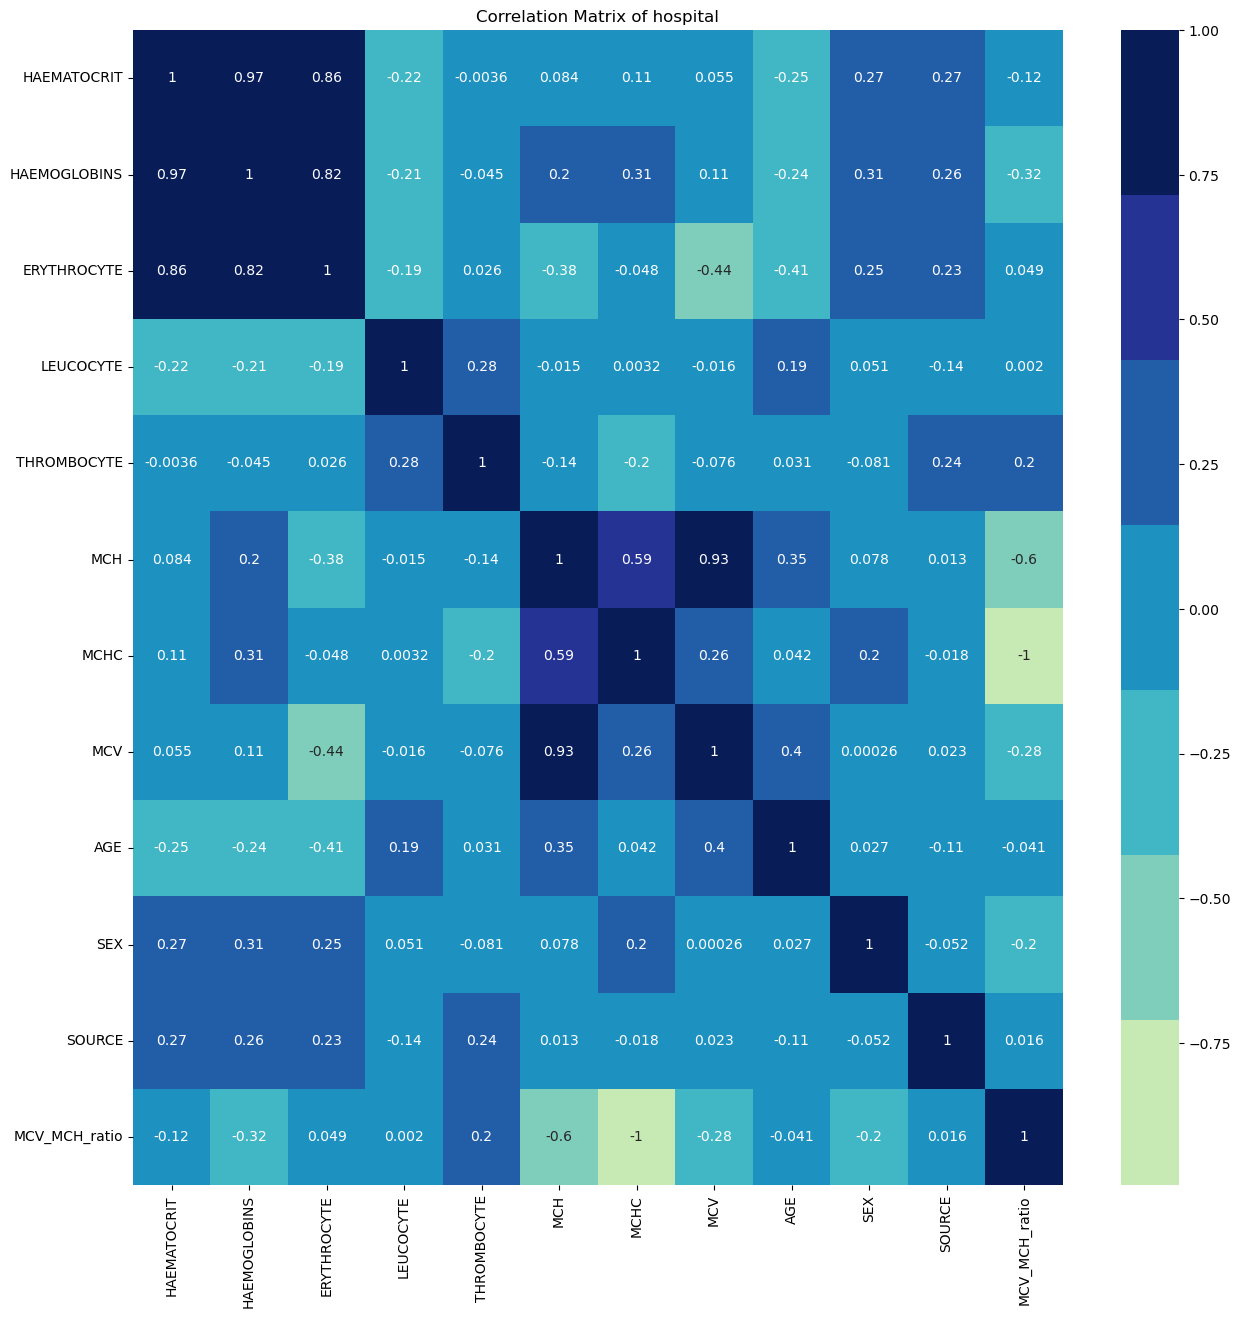

In [13]:
#Defining custom colors
colors = ["#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0", "#225ea8", "#253494", "#081d58"] 
#Creating the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap=colors)
plt.title('Correlation Matrix of hospital')
plt.show()

- The correlation matrix heat map provides a visual representation of the pairwise correlations between the numerical variables in our dataset. The color intensity indicates the strength and direction of the correlation, with darker colors representing stronger correlations. Positive correlations are shown in warmer colors (e.g., darkblue), while negative correlations are displayed in cooler colors (e.g., lightblue). The numbers within each cell represent the correlation coefficient, providing a quantitative measure of the correlation between the variables.